## Kernel to load: vax_inc_general 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pycountry
import pickle
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
import re

In [2]:
notebook_dir = os.path.dirname(os.getcwd())
source_data_path=os.path.join(notebook_dir, "Common Source Data")


In [3]:
df_vaccine=pd.read_csv(os.path.join(notebook_dir,'Vaccination Coverage','Supplementary Spreadsheet- Vaccination Coverage Estimates.csv'))
df_incidence=pd.read_csv('Supplementary Spreadsheet- Incidence Estimates.csv')

In [11]:
df=df_vaccine.merge(df_incidence.drop(columns=['Country']),on=['ISO3','Year','Animal','Disease'],how='outer')
df=df[df['Year']>=2005] # Vacc coverage before 2005 causes some countries to have 0 estimated incidence at odd past years due to group sum function

In [12]:
pop_countries_cattle = df['ISO3']

countries = {}
for country in pycountry.countries:
    countries[country.alpha_3] = country.name
    
for row in df.iterrows():
    if (row[1]['Country']==row[1]['Country']):
        countries[row[1]['ISO3']]=row[1]['Country']

codes_pop_cattle = [countries.get(country, 'Unknown code:'+country) for country in pop_countries_cattle]

iso3s_pop_cattle=[]

for i in pop_countries_cattle:
    try:
        iso3s_pop_cattle+=[countries[i]]
    except:
        iso3s_pop_cattle+=[None]
        
df['Country']=iso3s_pop_cattle


print(np.unique(codes_pop_cattle)) 

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia, Plurinational State of' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Congo, The Democratic Republic of the' 'Cook Islands'
 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czechia'
 "Côte d'Ivoire" 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Falkland Islands (Malvinas)' 'Faroe Islands'
 'Fiji' 'Finland' 'France' 'French Guiana' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Gr

In [13]:
len(np.unique(df.merge(df_incidence,how='outer')['ISO3']))

228

In [14]:
df_pop_cattle=pd.read_csv(os.path.join(source_data_path,'cattle','cattle_pop_2024.csv'))
df_pop_cattle = df_pop_cattle.sort_values('Value').drop_duplicates(subset=['ISO3','Year','Item'], keep='last').loc[:,['Area','Value','ISO3','Year']]
df_pop_cattle=df_pop_cattle.sort_values('Year').loc[:,['Area','Value','ISO3','Year']]
df_pop_cattle['Animal']=['Cattle']*df_pop_cattle.shape[0]
df_pop_cattle.rename(columns={'Value':'latest pop'},inplace=True)


df_pop_poultry=pd.read_csv(os.path.join(source_data_path,'poultry','poultry_pop_2024.csv'))
df_pop_poultry = df_pop_poultry.sort_values('Value').drop_duplicates(subset=['ISO3','Year','Item'], keep='last')
df_pop_poultry = (
    df_pop_poultry.groupby(['ISO3', 'Year Code'], as_index=False)
    .agg({
        'Domain Code': 'first',
        'Domain': 'first',
        'Area Code (M49)': 'first',
        'Area': 'first',
        'Element Code': 'first',
        'Element': 'first',
        'Item Code (CPC)': 'first',
        'Year Code': 'first',
        'Year': 'first',
        'Unit': 'first',
        'Value': 'sum',  
        'Flag': 'first',
        'Flag Description': 'first',
        'Note': 'first',
        'ISO3':'first'
    })
)
df_pop_poultry['Item'] = 'Poultry'
df_pop_poultry=df_pop_poultry.sort_values('Year').loc[:,['Area','Value','ISO3','Year']]
df_pop_poultry.rename(columns={'Value':'latest pop'},inplace=True)
df_pop_poultry['Animal']=['Poultry']*df_pop_poultry.shape[0]
df_pop_poultry['latest pop']*=1000

df_pop_swine=pd.read_csv(os.path.join(source_data_path,'swine','swine_pop_2024.csv'))
df_pop_swine = df_pop_swine.sort_values('Value').drop_duplicates(subset=['ISO3','Year','Item'], keep='last')
df_pop_swine=df_pop_swine.sort_values('Year').loc[:,['Area','Value','ISO3','Year']]
df_pop_swine.rename(columns={'Value':'latest pop'},inplace=True)
df_pop_swine['Animal']=['Pigs']*df_pop_swine.shape[0]


df_pop_killed_cattle=pd.read_csv(os.path.join(source_data_path,'cattle','killed_cattle_pop_2024.csv'))
df_pop_killed_cattle = df_pop_killed_cattle.sort_values('Value').drop_duplicates(subset=['ISO3','Year','Item'], keep='last')
df_pop_killed_cattle.rename(columns={'Value':'latest pop'},inplace=True)
df_pop_killed_cattle=df_pop_killed_cattle.sort_values('Year').loc[:,['Area','latest pop','ISO3','Year']]
df_pop_killed_cattle['Animal']=['Cattle']*df_pop_killed_cattle.shape[0]

df_pop_killed_poultry=pd.read_csv(os.path.join(source_data_path,'poultry','killed_poultry_pop_2024.csv'))
df_pop_killed_poultry = df_pop_killed_poultry.sort_values('Value').drop_duplicates(subset=['ISO3','Year','Item'], keep='last')
df_pop_killed_poultry = (
    df_pop_killed_poultry.groupby(['ISO3', 'Year Code'], as_index=False)
    .agg({
        'Domain Code': 'first',
        'Domain': 'first',
        'Area Code (M49)': 'first',
        'Area': 'first',
        'Element Code': 'first',
        'Element': 'first',
        'Item Code (CPC)': 'first',
        'Year Code': 'first',
        'Year': 'first',
        'Unit': 'first',
        'Value': 'sum', 
        'Flag': 'first',
        'Flag Description': 'first',
        'Note': 'first',
        'ISO3':'first'
    })
)
df_pop_killed_poultry['Item'] = 'Poultry'
df_pop_killed_poultry=df_pop_killed_poultry.sort_values('Year').loc[:,['Area','Value','ISO3','Year']]
df_pop_killed_poultry.rename(columns={'Value':'latest pop'},inplace=True)
df_pop_killed_poultry['Animal']=['Poultry']*df_pop_killed_poultry.shape[0]
df_pop_killed_poultry['latest pop']*=1000

df_pop_killed_swine=pd.read_csv(os.path.join(source_data_path,'swine','killed_swine_pop_2024.csv'))
df_pop_killed_swine = df_pop_killed_swine.sort_values('Value').drop_duplicates(subset=['ISO3','Year','Item'], keep='last')
df_pop_killed_swine=df_pop_killed_swine.sort_values('Year').loc[:,['Area','Value','ISO3','Year']]
df_pop_killed_swine.rename(columns={'Value':'latest pop'},inplace=True)
df_pop_killed_swine['Animal']=['Pigs']*df_pop_killed_swine.shape[0]

In [15]:
df_pops=pd.concat([df_pop_cattle,df_pop_poultry,df_pop_swine])

In [16]:
df_killed_pops=pd.concat([df_pop_killed_cattle,df_pop_killed_poultry,df_pop_killed_swine])
df_killed_pops.rename(columns={'latest pop':'killed pop'},inplace=True)

In [17]:
df_calculations_cases=df.merge(df_pops,how='left',on=['ISO3','Animal','Year'])
df_calculations_cases=df_calculations_cases.merge(df_killed_pops,how='left',on=['ISO3','Animal','Year'])

In [18]:
def remove_parentheses_and_content(input_string):
    # This regex matches a space followed by an opening parenthesis, then removes everything until the closing parenthesis
    return re.sub(r'\s?\(.*?\)', '', input_string)

In [19]:
def modify_dict_keys(input_dict):
    modified_dict = {}
    
    for key, value in input_dict.items():
        new_key = (key[0], key[1].replace(' (Inf. with)','').replace(' (-2011)',''))
        
        dict_shorthand=dict()
        
        dict_shorthand['lumpy']='LSD'
        dict_shorthand['velogenic']='vND'
        dict_shorthand['bursal ']='IBD'
        dict_shorthand['Newcastl ']='ND'
        dict_shorthand['classical swine fever']='CSF'
        dict_shorthand['bronchitis']='IB'
        dict_shorthand['foot']='FMD'
        
        for key in dict_shorthand.keys():
            if key in new_key[1].lower():
                new_key=(new_key[0],dict_shorthand[key])
                break


        modified_dict[new_key] = value
    
    return modified_dict

In [20]:
with open(os.path.join(source_data_path,'vaccines_sorted_by_use.pickle'), 'rb') as handle:
    _,_,_,top_vaccines=pickle.load(handle)
    
animals=[i[0] for i in top_vaccines]
vaccines=[i[1] for i in top_vaccines]

In [21]:
cattle_comprehensive=df_calculations_cases[df_calculations_cases['Animal']=='Cattle']
swine_comprehensive=df_calculations_cases[df_calculations_cases['Animal']=='Pigs']
poultry_comprehensive=df_calculations_cases[df_calculations_cases['Animal']=='Poultry']


### Incidence-derived cases estimate

In [22]:
cattle_comprehensive = cattle_comprehensive.copy()
cattle_comprehensive['Cases_estimated_via_incidence'] = (
    cattle_comprehensive['Incidence (Cases per 100,000)'].fillna(0) * 
    (cattle_comprehensive['latest pop'].fillna(0) +cattle_comprehensive['killed pop'].fillna(0))/ 100000
)

cattle_comprehensive['Cases_estimated_via_incidence_lower'] = (
    cattle_comprehensive['Incidence (Cases per 100,000) Lower'].fillna(0) * 
    (cattle_comprehensive['latest pop'].fillna(0) +cattle_comprehensive['killed pop'].fillna(0))/ 100000
)

cattle_comprehensive['Cases_estimated_via_incidence_upper'] = (
    cattle_comprehensive['Incidence (Cases per 100,000) Upper'].fillna(0) * 
    (cattle_comprehensive['latest pop'].fillna(0) +cattle_comprehensive['killed pop'].fillna(0))/ 100000
)


###
poultry_comprehensive = poultry_comprehensive.copy()
poultry_comprehensive['Cases_estimated_via_incidence'] = (
    poultry_comprehensive['Incidence (Cases per 100,000)'].fillna(0) * 
    (poultry_comprehensive['latest pop'].fillna(0) +poultry_comprehensive['killed pop'].fillna(0))/ 100000
)

poultry_comprehensive['Cases_estimated_via_incidence_lower'] = (
    poultry_comprehensive['Incidence (Cases per 100,000) Lower'].fillna(0) * 
    (poultry_comprehensive['latest pop'].fillna(0) +poultry_comprehensive['killed pop'].fillna(0))/ 100000
)

poultry_comprehensive['Cases_estimated_via_incidence_upper'] = (
    poultry_comprehensive['Incidence (Cases per 100,000) Upper'].fillna(0) * 
    (poultry_comprehensive['latest pop'].fillna(0) +poultry_comprehensive['killed pop'].fillna(0))/ 100000
)

###
swine_comprehensive = swine_comprehensive.copy()
swine_comprehensive['Cases_estimated_via_incidence'] = (
    swine_comprehensive['Incidence (Cases per 100,000)'].fillna(0) * 
    (swine_comprehensive['latest pop'].fillna(0) +swine_comprehensive['killed pop'].fillna(0))/ 100000
)

swine_comprehensive['Cases_estimated_via_incidence_lower'] = (
    swine_comprehensive['Incidence (Cases per 100,000) Lower'].fillna(0) * 
    (swine_comprehensive['latest pop'].fillna(0) +swine_comprehensive['killed pop'].fillna(0))/ 100000
)

swine_comprehensive['Cases_estimated_via_incidence_upper'] = (
    swine_comprehensive['Incidence (Cases per 100,000) Upper'].fillna(0) * 
    (swine_comprehensive['latest pop'].fillna(0) +swine_comprehensive['killed pop'].fillna(0))/ 100000
)


In [23]:
cattle_comprehensive_2024=cattle_comprehensive[cattle_comprehensive['Year']==2024]
poultry_comprehensive_2024=poultry_comprehensive[poultry_comprehensive['Year']==2024]
swine_comprehensive_2024=swine_comprehensive[swine_comprehensive['Year']==2024]

In [24]:
disease_global_look=pd.read_csv('Supplementary- Disease Incidence XGBoost Model Performance, Selected Hyperparameters.csv')
disease_global_look=[i.split('_')[0] for i in disease_global_look['Unnamed: 0'].values]

In [25]:
def easier_format(num, pos):
    """
    Format any number into a more readable format in millions with one decimal.
    """
    return f"{num/1_000_000:.1f}M"

In [26]:
def get_top_diseases(dataframe, top_n=3):
    """Get top N diseases based on 'Aggregate of Latest Reported Cases (up to Year)'."""
    top_diseases = (
        dataframe.groupby('Disease')
        .sum()
        .sort_values('Aggregate of Latest Reported Cases (up to Year)', ascending=False)
        .index[:top_n]
        .tolist()
    )
    
    if ('Echinococcosis/hydatidosis' in top_diseases) and ('Echinococcus granulosus (Inf. with) (2014-)' in top_diseases): 
        top_diseases = (
            dataframe.groupby('Disease')
            .sum()
            .sort_values('Aggregate of Latest Reported Cases (up to Year)', ascending=False)
            .index[:top_n+1]
            .tolist()
        )
        top_diseases = [i for i in top_diseases if i != 'Echinococcus granulosus (Inf. with) (2014-)']
    return top_diseases

def aggregate_cases_by_disease(dataframe, diseases, animal):
    """Aggregate cases by the top diseases."""
    aggregated_data = {}
    for disease in diseases:
        disease_data = dataframe[dataframe['Disease'] == disease]
        cases = disease_data.groupby('Year')['Cases_estimated_via_incidence'].sum().to_dict()
        lower = disease_data.groupby('Year')['Cases_estimated_via_incidence_lower'].sum().to_dict()
        upper = disease_data.groupby('Year')['Cases_estimated_via_incidence_upper'].sum().to_dict()
        aggregated_data[disease] = {"cases": cases, "lower": lower, "upper": upper}
    return aggregated_data

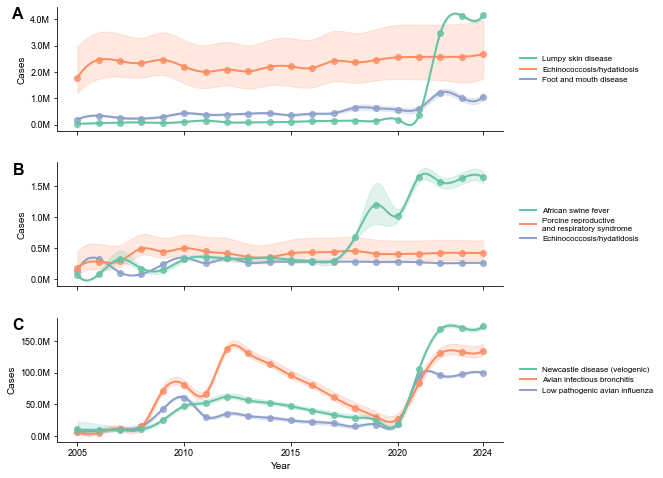

In [27]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Green, Orange, Blue

rcParams['font.family'] = 'Arial'




cattle_further_assessed = cattle_comprehensive_2024[cattle_comprehensive_2024['Disease'].isin(disease_global_look)]
poultry_further_assessed = poultry_comprehensive_2024[poultry_comprehensive_2024['Disease'].isin(disease_global_look)]
swine_further_assessed = swine_comprehensive_2024[swine_comprehensive_2024['Disease'].isin(disease_global_look)]

# Get top diseases for each animal
top_cattle_diseases = get_top_diseases(cattle_further_assessed)
top_poultry_diseases = get_top_diseases(poultry_further_assessed)
top_swine_diseases = get_top_diseases(swine_further_assessed)

# Aggregate cases for top diseases
cattle_data = aggregate_cases_by_disease(cattle_comprehensive, top_cattle_diseases, 'cattle')
poultry_data = aggregate_cases_by_disease(poultry_comprehensive, top_poultry_diseases, 'poultry')
swine_data = aggregate_cases_by_disease(swine_comprehensive, top_swine_diseases, 'swine')

# Combine data for plotting
animal_data = {
    "Cattle": cattle_data,
    "Swine": swine_data,
    "Poultry": poultry_data,
}

def clean_disease_name(disease):
    """Remove unnecessary substrings from disease names."""
    return disease.replace(" virus (Inf. with)", "").replace(" (poultry) (2006-2021)", "")

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8), sharex=True)
labels = ['A', 'B', 'C']

for idx, (animal, diseases_data) in enumerate(animal_data.items()):
    ax = axes[idx]
    
    sorted_diseases = sorted(
        diseases_data.items(),
        key=lambda item: list(item[1]["cases"].values())[-1],  
        reverse=True  
    )

    for i, (disease, data) in enumerate(sorted_diseases):
        color = colors[i % len(colors)]
        
        cleaned_name = clean_disease_name(disease)
        
        years = np.array(list(data["cases"].keys()))
        cases = np.array(list(data["cases"].values()))
        lower = np.array(list(data["lower"].values()))
        upper = np.array(list(data["upper"].values()))
        
        # Interpolation for smoothing
        interpolated_years = np.linspace(years.min(), years.max(), 500)
        spline = make_interp_spline(years, cases, k=3)
        smoothed_values = spline(interpolated_years)
        lower_spline = make_interp_spline(years, lower, k=3)
        smoothed_lower = lower_spline(interpolated_years)
        upper_spline = make_interp_spline(years, upper, k=3)
        smoothed_upper = upper_spline(interpolated_years)
        
        zorder_confidence = 10 - i
        zorder_line = 11 - i      
        zorder_scatter = 12 - i   
        
        # Plot the confidence interval first
        ax.fill_between(interpolated_years, smoothed_lower, smoothed_upper, color=color, alpha=0.2, zorder=zorder_confidence)
        
        # Plot the smoothed line on top of the confidence interval
        if cleaned_name == 'Porcine reproductive and respiratory syndrome':
            cleaned_name = 'Porcine reproductive\nand respiratory syndrome'
        ax.plot(interpolated_years, smoothed_values, label=f"{cleaned_name}", color=color, linewidth=2, zorder=zorder_line)
        
        # Add scatter points
        ax.scatter(years, cases, color=color, marker='o', alpha=0.8, zorder=zorder_scatter)

    ax.text(-0.1, 1, labels[idx], transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
    
    ax.set_ylabel('Cases', fontsize=10)
    ax.yaxis.set_major_formatter(FuncFormatter(easier_format))
    ax.tick_params(axis='both', which='major', labelsize=9)
    
    legend = ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5),
                       ncol=1, fontsize=8, frameon=True,
                       facecolor='white', edgecolor='none', framealpha=0.55)
    legend.set_zorder(20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    tick_years = list(np.arange(years.min(), years.max() + 1, 5))  # Every 5 years
    if 2024 not in tick_years:
        tick_years.append(2024)
    tick_years = sorted(tick_years) 
    ax.set_xticks(tick_years)
    ax.set_xticklabels([int(i) for i in tick_years], fontsize=9)    

plt.xlabel('Year', fontsize=10)
plt.subplots_adjust(hspace=0.25, top=0.88)

fig.savefig('Estimated_Cases_Top_Three_Diseases_Per_Animal_(Top_Diseases_Based_on_Reported_Cases)2.svg', format='svg', bbox_inches='tight', facecolor='white')
fig.savefig('Estimated_Cases_Top_Three_Diseases_Per_Animal_(Top_Diseases_Based_on_Reported_Cases)2.png', format='png', bbox_inches='tight', dpi=600, facecolor='white')
plt.show()


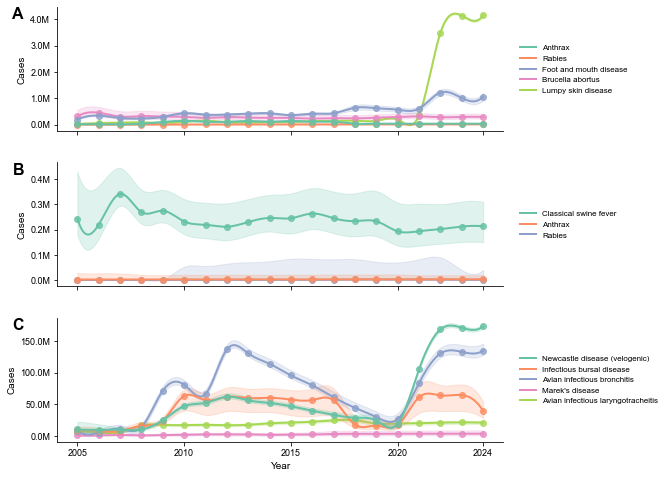

In [28]:
colors = ['#66c2a5',  # teal
          '#fc8d62',  # coral
          '#8da0cb',  # light blue
          '#e78ac3',  # pale pink
          '#a6d854']  # light green
rcParams['font.family'] = 'Arial'



simplified_animal_diseases = {
    'Poultry': ['Newcastle disease (velogenic)',
                'Infectious bursal disease (Gumboro disease)',
                'Avian infectious bronchitis',
                "Marek's disease (-2011)",
                'Avian infectious laryngotracheitis'],
    'Cattle': ['Anthrax',
               'Rabies virus (Inf. with)',
               'Foot and mouth disease virus (Inf. with)',
               'Brucella abortus (Inf. with)',
               'Lumpy skin disease virus (Inf. with)'],
    'Pigs': ['Classical swine fever virus (Inf. with)',
             'Anthrax',
             'Rabies virus (Inf. with)']
}

cattle_data = aggregate_cases_by_disease(cattle_comprehensive, simplified_animal_diseases['Cattle'], 'cattle')
poultry_data = aggregate_cases_by_disease(poultry_comprehensive, simplified_animal_diseases['Poultry'], 'poultry')
pigs_data    = aggregate_cases_by_disease(swine_comprehensive, simplified_animal_diseases['Pigs'], 'pigs')

# Combine the aggregated data for plotting; note that we now use "Pigs" as the key to match our dictionary.
animal_data = {
    "Cattle": cattle_data,
    "Pigs": pigs_data,
    "Poultry": poultry_data,
}

def clean_disease_name(disease):
    """Remove unnecessary substrings from disease names."""
    disease = disease.replace(" virus (Inf. with)", "").replace(" (poultry) (2006-2021)", "").replace('(Gumboro disease)','')
    disease = disease.replace(" (-2011)",'')
    disease = disease.replace(' (Inf. with)','')
    return disease

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 8), sharex=True)
labels = ['A', 'B', 'C']

for idx, (animal, diseases_data) in enumerate(animal_data.items()):
    ax = axes[idx]
    
    disease_list = simplified_animal_diseases[animal]
    
    for i, disease in enumerate(disease_list):
        if disease not in diseases_data:
            continue
        data = diseases_data[disease]
        color = colors[i % len(colors)]
        
        cleaned_name = clean_disease_name(disease)
        if cleaned_name == 'Porcine reproductive and respiratory syndrome':
            cleaned_name = 'Porcine reproductive\nand respiratory syndrome'
        
        years = np.array(list(data["cases"].keys()))
        cases = np.array(list(data["cases"].values()))
        lower = np.array(list(data["lower"].values()))
        upper = np.array(list(data["upper"].values()))
        
        # Interpolate for smoothing the curves
        interpolated_years = np.linspace(years.min(), years.max(), 500)
        spline = make_interp_spline(years, cases, k=3)
        smoothed_values = spline(interpolated_years)
        lower_spline = make_interp_spline(years, lower, k=3)
        smoothed_lower = lower_spline(interpolated_years)
        upper_spline = make_interp_spline(years, upper, k=3)
        smoothed_upper = upper_spline(interpolated_years)
        
        zorder_confidence = 10 - i 
        zorder_line = 11 - i       
        zorder_scatter = 12 - i    
        
        # Plot confidence interval
        ax.fill_between(interpolated_years, smoothed_lower, smoothed_upper,
                        color=color, alpha=0.2, zorder=zorder_confidence)
        # Plot smoothed line
        ax.plot(interpolated_years, smoothed_values, label=f"{cleaned_name}",
                color=color, linewidth=2, zorder=zorder_line)
        # Plot actual data points
        ax.scatter(years, cases, color=color, marker='o', alpha=0.8, zorder=zorder_scatter)
    
    ax.text(-0.1, 1, labels[idx], transform=ax.transAxes, fontsize=16,
            fontweight='bold', va='top', ha='left')
    
    ax.set_ylabel('Cases', fontsize=10)
    ax.yaxis.set_major_formatter(FuncFormatter(easier_format))
    ax.tick_params(axis='both', which='major', labelsize=9)
    
    legend = ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5),
                       ncol=1, fontsize=8, frameon=True,
                       facecolor='white', edgecolor='none', framealpha=0.55)
    legend.set_zorder(20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    tick_years = list(np.arange(years.min(), years.max() + 1, 5))
    if 2024 not in tick_years:
        tick_years.append(2024)
    tick_years = sorted(tick_years)
    ax.set_xticks(tick_years)
    ax.set_xticklabels([int(i) for i in tick_years], fontsize=9)    

plt.xlabel('Year', fontsize=10)
plt.subplots_adjust(hspace=0.25, top=0.88)

fig.savefig('Estimated_Cases_Top_Eleven_Vaccinated_Diseases_Per_Animal2.svg',
            format='svg', bbox_inches='tight', facecolor='white')
fig.savefig('Estimated_Cases_Top_Eleven_Vaccinated_Diseases_Per_Animal2.png',
            format='png', bbox_inches='tight', dpi=600, facecolor='white')
plt.show()
